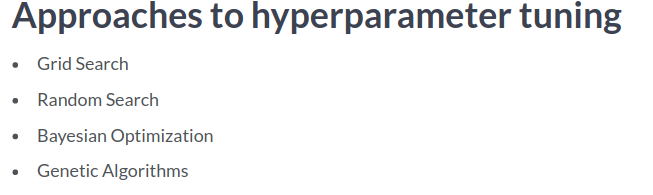

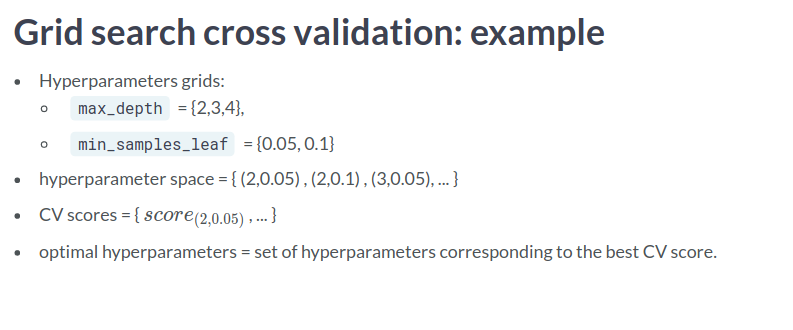

In [1]:
import pandas as pd

p = "https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv"

df = pd.read_csv(p)

In [2]:
X = df.drop(labels=['id', 'diagnosis', 'Unnamed: 32'], axis=1).values
y = df['diagnosis'].values

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=42)

In [5]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
'max_depth': [3, 4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}

In [6]:
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)

In [7]:
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_fe

In [8]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 0.06}


In [9]:
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy'.format(best_CV_score))

Best CV accuracy


In [10]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.883


In [ ]:
best_model.predict_proba

# Tuning an RF's Hyperparameters

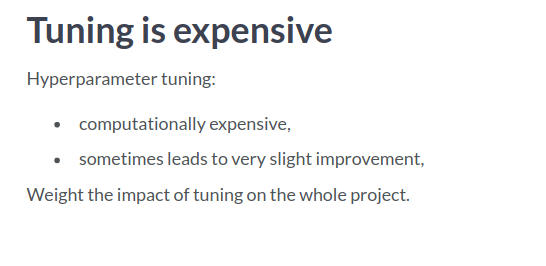

In [11]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Set seed for reproducibility
SEED = 1
# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= SEED)

In [12]:
# Inspect rf' s hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}